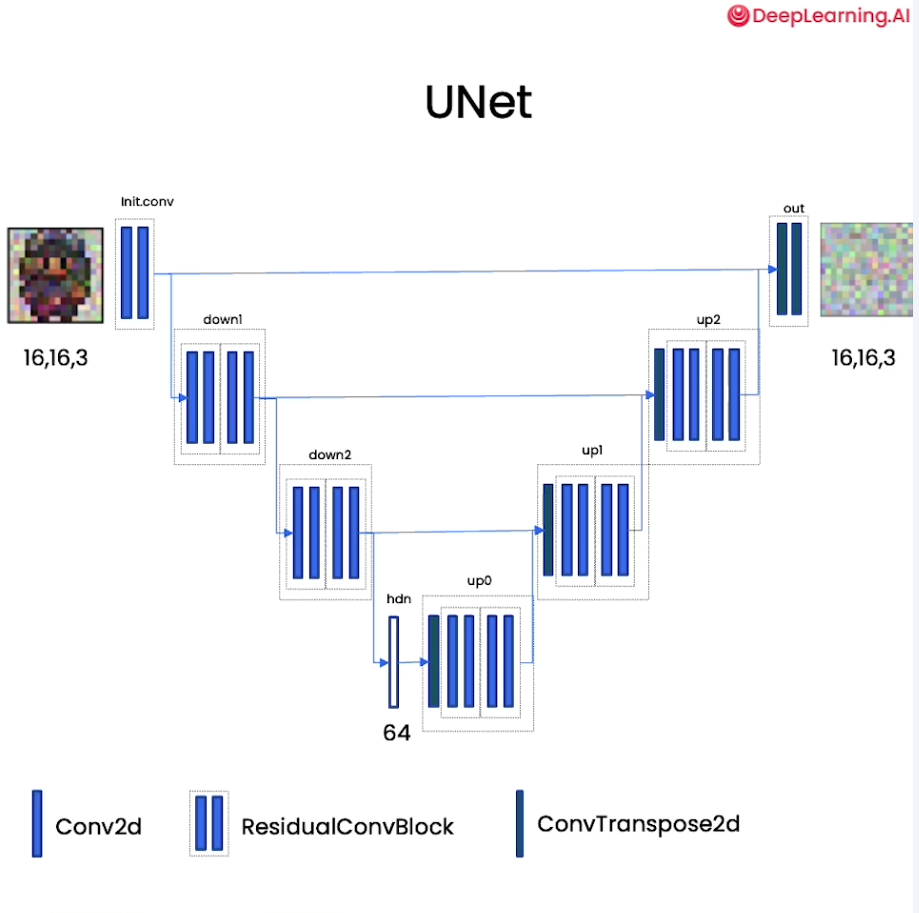

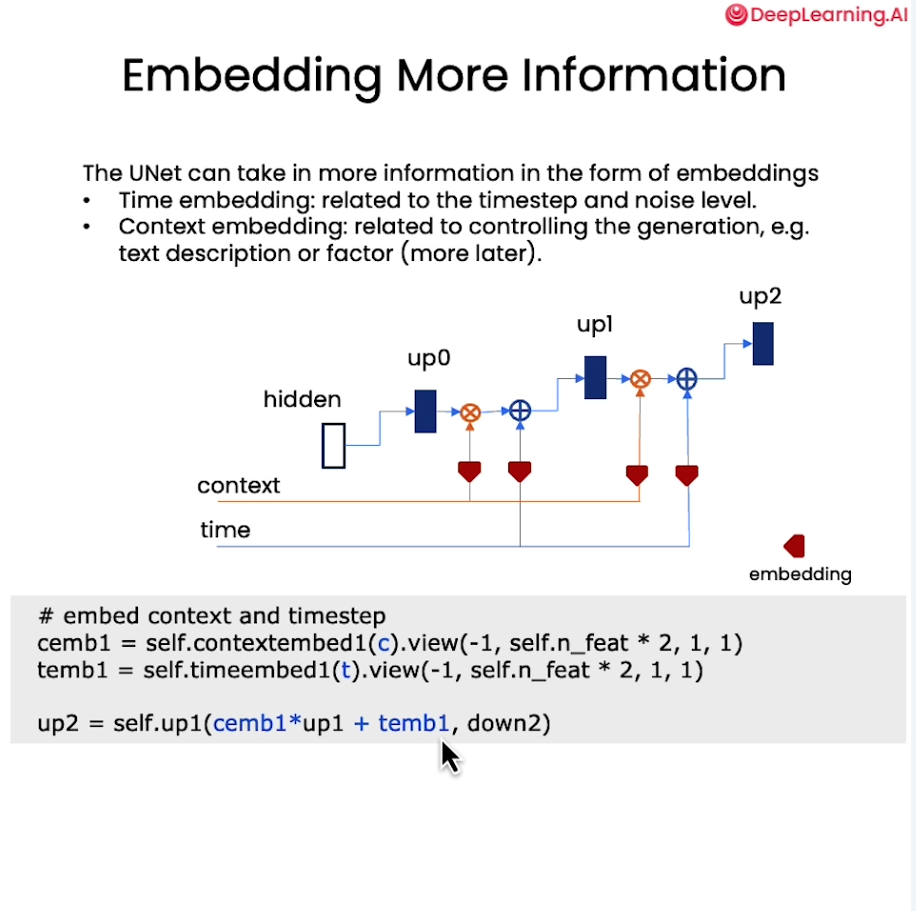

圖中的 context embedding 和 time embedding 是擴散模型（Diffusion Model）中的兩種重要嵌入向量，用於提供額外資訊給 UNet 神經網絡：

**Context Embedding（上下文嵌入）**：
- 這是與控制生成過程相關的嵌入，例如文字描述或特定因素
- 它允許模型根據外部條件（如文字提示）生成特定內容
- 在文生圖模型中，這通常是文字描述的嵌入表示
- 例如：在 Stable Diffusion 中，這可能是 CLIP 文字編碼器產生的文字提示嵌入

**Time Embedding（時間嵌入）**：
- 與擴散過程的時間步驟和噪聲級別相關
- 告訴模型當前處於去噪過程的哪個階段
- 對於模型了解應該去除多少噪聲至關重要
- 時間步嵌入通常使用正弦位置編碼（sinusoidal position encoding）進行轉換

從代碼片段可以看出：
```python
cemb1 = self.contextembed1(c).view(-1, self.n_feat * 2, 1, 1)
temb1 = self.timeembed1(t).view(-1, self.n_feat * 2, 1, 1)
up2 = self.up1(cemb1*up1 + temb1, down2)
```

這段代碼將上下文嵌入（cemb1）與上一層輸出（up1）相乘，然後加上時間嵌入（temb1），作為輸入傳遞給上採樣層（up1），生成新的特徵表示（up2）。       
這種方式允許上下文和時間資訊在整個 UNet 架構中的不同層級進行條件控制。